# ECS7020P mini-project submission BASIC Solution

The mini-project consists of two components:


1.   **Basic solution** [6 marks]: Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).
2.   **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd Hums and Whistles dataset and build a solution model. (ii) Create a product that uses the functionality provided by a model trained on the MLEnd Hums and Whistles dataset (e.g. a simple App that predicts the label Harry or StarWars when you hum to it).  

The submission will consist of two Jupyter notebooks, one for the basic solution and another one for advanced solution. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zipped and submitted toghether**.

Each uploaded notebook should consist of: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks will not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Akansh Katyayan

**Student ID**:  210282553



# 2 Problem formulation

This notebook is for basic solution on MLEnd Hums and Whistle data in which we are building a machine learning pipeline which can take an input as any of the hum/whistle record of the below 2 songs and identify the song. 
1. Potter
2. StarWars

# 3 Machine Learning pipeline

Machine Learning pipeline is the end-to-end construct that orchestrates the completed process of data into, and output from, a machine learning model. It includes a raw data input, feature engineering, outputs, the machine learning model and model parameters, and prediction outputs.

1. **Data Extraction and Data Cleaning:** MLEnd Hums and Whistle dataset consists of raw audio files which are extracted from the QMUL repository and stored in the private google drive. Potter and StarWars audio files are used to extract and clean the information about the data. This includes **Data Visualization**(to get an idea of the data) and **Data Sampling **(take samples of data to process instead of working on the whole dataset to optimize time computation)

2. **Feature Engineering:** 
Choose and define the features which our model will use to evaluate the audio  files.
Compute the features for each audio file and build a feature dataframe with the required features.

3. **Model exploration:** Assessment for the models that make sense for the classification dataset

4. **Training the model:** Choose and optimize the properties of our model on validation data - hyperparameters

5. **Evaluate the model's performance:** Evaluate the accuracy of our model on the validation data which is 20% of the training dataset.


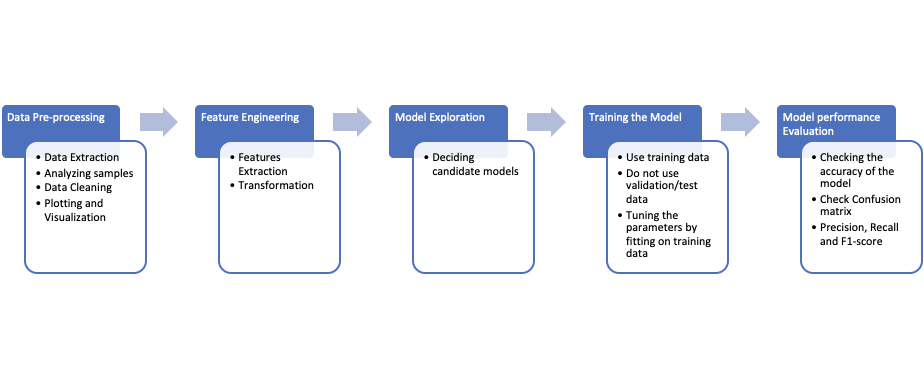

# 4 Transformation stage

**Data pre-processing (Data cleaning and feature engineering)** comprises the most crucial aspect of constructing a machine learning models and often decides the success/failure of the model.Features extraction needs a thorough research on the domain of the problem and accordingly need to use the features to represent the data. For features to be useful in classification they must have high variance between the labelled classes.

MLEnd Hums and Whistle Data consists of raw audio files in a wav format. An audio file can be represented as a time series with the dependent axis being the amplitude of the audio waveform. The waveform of the sound file is all the information we have with which to create features to train our model. There are multiple transformations required to process the audio signals.

Read all the files and extract filename, Participant Id, Interpretation type, Number (song by same user), song title. Filenames are not consistent, so data cleaning is performed on the files data as explained later in the notebook.

**Decomposition**

These audio files are in wav (Waveform Audio File) format which consists of hundreds of thousands of dimensions.  Therefore, relevant features are extracted from the audio signals. Librosa library of python is used to extract the below features: 

  1. Power.
  2. Pitch mean.
  3. Pitch standard deviation.
  4. Fraction of voiced region

There are visible differences in the pitch of songs but we need more suitable features for audio classification. 

**Short-Time Fourier Transform (STFT)**:
we'll use the Short-Time Fourier Transform (STFT) which will cut our audio waveform into short, overlapping equal length segments and take the Fourier transform. Librosa library in python helps to abstract away all the math and fetch most of the details of chromagrams, and MFCC. 

We will build our feature extraction functions to get another two features for each of our audio files.:

  5. **Chromagram**
  6. **MFC coefficients** 

Because the chromagram and MFCCs are calculated on audio frames produced by STFT, we're going to take a mean of the matrix received from each function and append them in a matrix to represent all the features for each audio in a single dataframe.

**Chromagram**: The term chroma feature or chromagram closely relates to the twelve different pitch classes.

**MFCC**: Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively represents the power spectrum of an audio signal in a frequency region (a region of pitch) taken w.r.t. time.
We are using 40 number of coefficients to return at n_mfcc=40 which worked well compared to 20 coefficients.

**Scaling**:
Data may have numeric attributes that varies in different ranges. Scaling is about normalizing these attributes so that they will have the same scale, such as between 0 and 1.


# 5 Modelling

As the problem statement is to classify the songs into Potter or StarWars based on the audio signal features. We will first select some of the classic Machine learning classification models like **Support Vector Machines classifier(SVC)**, **k-Nearest-Neighbout clasifier(kNN)**, **LogisticRegression classifier**, **Decision Trees**, **Random Forest Classifier**, **Gaussian Naive Bayes**, etc.

Top 3 classifiers with the overall accuracy from the above classifiers will be selected and analyzed in detail.

We will also explore the Artificial Neural Network (ANN) well-suited for predictions trained on labelled inputs. We will be building a MLPClassfier and train it on the training data and evaluate using the validation data. MLPClassifier is also tuned using the GridSearchCV  to get the best parameters value and analyze the performance of the model on validation data for those parameters.

Also, data needs to be scaled before using it to train the model because different features have different range of values and thus model can give more weight to the features with higher range. Sklearn library's StandardScaler is used for features with unknown distributions because centering the features at zero-mean with a standard deviation of 1 means extreme values will have less of an impact on the model's learned weights, so that the model is less sensitive to the outliers.

To process these functions, sklearn library's machine learning pipeline is used which automates the above steps and calculates the accuracy of the models on the validation data to assess the performance of the model.


# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

The goal of this step is to develop the simplest model able to formulate a target value fast and well enough. More accurately, the proper approach for training and evaluating a model is :

Train the selected model on a training set.

Evaluate the model on a validation set (unseen data for the model)

Hyperparamters tuning to identify the best parameters for the selected model on the training data and evaluate again on Validation data.

Finally train the model with the best parameters and test the accuracy of the model.

**Note**: Do not tune the model to score well on the test set.

Evaluation Measures:

**Confusion Matrix: **
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes, here N=2 (StarWars and Potter). So, it will give us 2 X 2 matrix with True Positive values, True Negative values, False Positive and False Negative values for the classification.

**Precision, Recall, F-Score**
The confusion matrix is an intuitive measure of the precision and recall of our model with respect to each class. 

**Precision** is a measure of how many positive predictions are true positives and is calculated as:

Precision = TruePositives / (TruePositives + FalsePositives)

**Recall** is a measure of how many positives we actually predicted from all positive samples in the dataset and is calculated as:

Recall = TruePositives / (TruePositivves + FalseNegatives)

Lower precision means we have more false positives, while lower recall means we have more false negatives. 

For this dataset, *precision of each song is how often we correctly predict it and recall is how many of that song we predicted out of all samples with that song in the dataset*.

**The F-score** is a weighted average of precision and recall when we are equally concerned with both the metrics.

F-score = (2 * Precision * Recall) / (Precision + Recall)

In our approach we are checking these measures to assess the overall performance of the model and its accuracy.

# 7 Dataset

Information of the Dataset:

1. **Title**: MLEnd Hums and Whistle Dataset

2. **Sources**:

   (a) **Origin**:  This dataset has been taken from the MLEnd Hums and Whistle data collected and maintained at Queen Mary University of London.
   
   (b) **Creator**:  Dr. Requena-Carrion and MSc. Big Data Science batch of 2021-2022
   
   (c) **Date**: Nov 8, 2021

3. **Relevant Information:**

   Contains Hums and Whistles recording of ~15 seconds for below 2 song which is a subset of the original dataset which contains data for 8 songs.
   1. Potter
   2. StarWars

4. **Number of Instances:** 824 Instance. 6 Instances have been discarded because of bad naming convention. </br>
Total Instance after pre-processing: 818 </br>
    Potter:      409 </br>
    StarWars:    409 </br>

5. **Attribute Information:**
    Information which can be fetched from the filenames
    1. Participant ID         Id of the participant who hummed/whistled the song
    2. Interpretation         Category - hum / whistle 
    3. Number                 hum/whistle sample by each participant
    4. Song                   song out of above 8 songs


## Import required libraries/packages for the project

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


##7.1 Data Extraction

In this section, we will download the Potter and StarWars data using the below links:

**Potter**

Part 1: https://collect.qmul.ac.uk/down?t=6122TDAA73VPCMDQ/5DSHD27BLQMK5S8E1HLG19O

Part 2: https://collect.qmul.ac.uk/down?t=4LV64IN5OK5E35NN/4H6DJTRS7KVD704UG2CN0IG

**StarWars**

Part 1: https://collect.qmul.ac.uk/down?t=650T7K3FAE26MB29/592IN2FALUM43SGC35O0580

Part 2: https://collect.qmul.ac.uk/down?t=6L5DHHRODAMK82R8/4512VDDUEFGBAPK0S82ENGO



In [ ]:
# Function to download the data
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
      filename = dl_file.geturl().split('/')[-1]
      savefile = save_path + filename
      print("File: {} to be saved at the location: {}".format(filename, savefile))
      with open(savefile, 'wb') as out_file:
        out_file.write(dl_file.read())

# Define URLs and download the data
save_path = '/content/drive/MyDrive/Data/MLEndHW/'
list_url = ["https://collect.qmul.ac.uk/down?t=6122TDAA73VPCMDQ/5DSHD27BLQMK5S8E1HLG19O",
            "https://collect.qmul.ac.uk/down?t=4LV64IN5OK5E35NN/4H6DJTRS7KVD704UG2CN0IG",
            "https://collect.qmul.ac.uk/down?t=650T7K3FAE26MB29/592IN2FALUM43SGC35O0580",
            "https://collect.qmul.ac.uk/down?t=6L5DHHRODAMK82R8/4512VDDUEFGBAPK0S82ENGO"
            ]

#Below command downloads the data into a save path. Commented as data has been downloaded already.
# for url in list_url:  
#   download_url(url, save_path)

In [ ]:
"""Commands to Unzip the files into a Songs folder. Commented as songs have been already unzipped. No need to unzip again"""

# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Songs/'
# for path in os.listdir(save_path):
#   full_path = os.path.join(save_path, path)
#   if os.path.isfile(full_path) and path.endswith(".zip") and path != "MLEndHW_Sample.zip":
#     print("Unzipping File: {}".format(path))
#     try:
#       with zipfile.ZipFile(full_path, 'r') as zip_ref:
#         zip_ref.extractall(directory_to_extract_to)
#     except Exception as e:
#       print("Error in unzipping file: {}. Error: {}".format(path, str(e)))
#     finally:
#       zip_ref.close()

"""folder which contains all the unzipped songs for Potter and StarWars."""
sample_path = '/content/drive/MyDrive/Data/MLEndHW/Songs/*.wav'
files = glob.glob(sample_path)
print("Total files in Songs folder: {}".format(len(files)))

Total files in Songs folder: 824


## 7.2 Data Pre-processing:
Data pre-processing is an important step in the machine learning workflow. pre-processing is required for the given raw audio data to understand it better. All the unzipped audio files are read and cleaned as below:

**Data cleaning**
Each audio file in the data is supposed to follow the below naming convention.
participantid_interpretationtype_number_songname.wav
eg: 

S1_hum_1_Potter.wav

S2_whistle_2_Rain.wav

Songs which do not follow the naming convention as above have been discarded using an exception handling in python.

Songs are mis-spelled in the filenames, thus spelling correction is done to record the correct name for each song. 

Unnecessary special symbols have been removed from the filenames.

Lastly, data is recorded in a dataframe which contains information for each song. 

In [ ]:
# Define list of songs for pre-processing
songs_detail = [] 
discarded_songs = []
songs_in_scope = ["Potter", "StarWars"]

# Lists of words spelt incorrectly in the file names for Hums and Whistle data.
hums_values = ["hum", "hun", "ham"]
whistles_values = ["whistle", "whisle", "whislte", "wistle"]
potter_titles = ["potter"]
sw_titles = ["starwars", "starwar", "starswars", "statwars", "startwars", "star_wars", "imperial"]

def perform_data_cleaning(input_files):
  # Loop over all the audio files
  for file in input_files:
    try:
      file_name = os.path.basename(file)
      participant_ID = file_name.split('_')[0]    

      # Handle Interpretation type for unstructured filenames 
      if file_name.split('_')[1].lower() not in ['hum', 'whistle']:
        
        if any(hums_value in file_name.lower() for hums_value in hums_values):
          interpretation_type = "hum"
        elif any(wishtle_value in file_name.lower() for wishtle_value in whistles_values):
          interpretation_type = "whistle"
        else:
          discarded_songs.append(file_name)
          continue
      else:
        interpretation_type = file_name.split('_')[1].lower()
      
      interpretation_number = file_name.split('_')[2]

      # Handle Song Title
      song_title_check = file_name.split('_')[3].split('.')[0]
      if  song_title_check not in songs_in_scope:
        correct_file_name = file_name.rsplit('.')[0]

        # Remove unnecessary characters from the name
        for char in ["[", "]", " ", ".wav", "wav", ""]:
          correct_file_name = correct_file_name.replace(char, "")
        if any(potter_title in correct_file_name.lower() for potter_title in potter_titles):
          song = "Potter"
        elif any(sw_title in correct_file_name.lower() for sw_title in sw_titles):
          song = "StarWars"
        else:
          discarded_songs.append(file_name)
          continue
      else:
        song = song_title_check
      
      songs_detail.append([file_name,participant_ID,interpretation_type,interpretation_number, song, file])
    except Exception as e:
      #print("Error in extracting info from file {}. Error: {}".format(file, str(e)))
      discarded_songs.append(file_name)

  df_songs = pd.DataFrame(songs_detail,columns=['file_id','participant','interpretation','number','song', 'file_path']).set_index('file_id') 
  print("Unique Songs in the data: {}".format(df_songs['song'].unique()))
  print("Discarded Files: {}, {}".format(len(discarded_songs), discarded_songs))
  return df_songs


In [ ]:
# Create a dataframe with the extracted information from the audio file names
df_all_songs = perform_data_cleaning(files)
df_all_songs.drop_duplicates(inplace=True)
display(df_all_songs)

# Check Unique counts for each song
unique, counts = np.unique(df_all_songs['song'], return_counts=True)
print("Number of files for each song: {}".format(dict(zip(unique, counts))))

# Sample of the dataframe was used for extracting the features and analyzing the performance of the model to avoid long processing time.
# df_sample = df_all_songs.sample(n=100, replace=False)
# display(df_sample)

Unique Songs in the data: ['Potter' 'StarWars']
Discarded Files: 6, ['S42_Hum2_StarWar.wav', 'S42_Hum3.StarWar.wav', 'S95_Hum 1 StarWars.wav', 'S95_Whistle 1 StarWars.wav', 'S95_Hum 2 Potter.wav', 'S95_Whistle 2 Potter.wav']


,participant,interpretation,number,song,file_path
file_id,,,,,
S1_hum_2_Potter.wav,S1,hum,2,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S1_h...
S1_whistle_2_Potter.wav,S1,whistle,2,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S1_w...
S3_hum_1_Potter.wav,S3,hum,1,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S3_h...
S3_hum_2_Potter.wav,S3,hum,2,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S3_h...
S2_hum_2_Potter.wav,S2,hum,2,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S2_h...
...,...,...,...,...,...
S110_hum_2_Potter.wav,S110,hum,2,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S110...
S110_hum_1_Potter.wav,S110,hum,1,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S110...
S111_hum_2_Potter.wav,S111,hum,2,Potter,/content/drive/MyDrive/Data/MLEndHW/Songs/S111...


Number of files for each song: {'Potter': 409, 'StarWars': 409}


## 7.3 Data Analysis and Visualization

Let's compare the waveforms for Potter vs Starwars for both Hums and Whistle data.

In [ ]:
# Take two samples of both the songs
potter_hum = df_all_songs[(df_all_songs['song'] == "Potter") & (df_all_songs['interpretation'] == "hum")]["file_path"][0]
potter_whistle = df_all_songs[(df_all_songs['song'] == "Potter") & (df_all_songs['interpretation'] == "whistle")]["file_path"][0]

starwars_hum = df_all_songs[(df_all_songs['song'] == "StarWars") & (df_all_songs['interpretation'] == "hum")]["file_path"][0]
starwars_whistle = df_all_songs[(df_all_songs['song'] == "StarWars") & (df_all_songs['interpretation'] == "whistle")]["file_path"][0]

### Plotting Waveforms

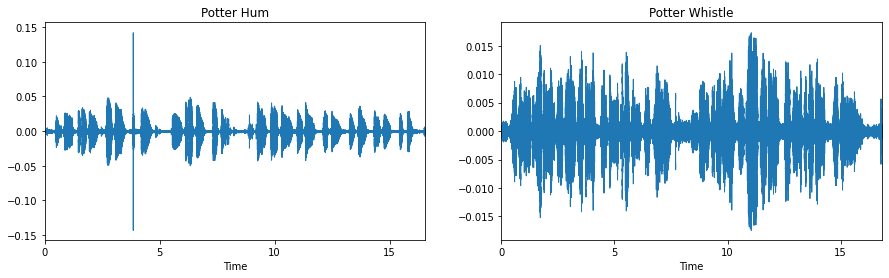

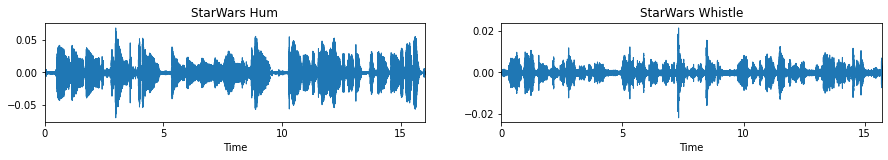

In [ ]:
import librosa.display
import soundfile

with soundfile.SoundFile(potter_hum) as audio:
    potter_hum_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(potter_hum_waveform, sr=sample_rate)
    plt.title('Potter Hum')

with soundfile.SoundFile(potter_whistle) as audio:
    potter_whistle_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveplot(potter_whistle_waveform, sr=sample_rate)
    plt.title("Potter Whistle")


with soundfile.SoundFile(starwars_hum) as audio:
    starwars_hum_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(2, 2, 1)
    librosa.display.waveplot(starwars_hum_waveform, sr=sample_rate)
    plt.title('StarWars Hum')

with soundfile.SoundFile(starwars_whistle) as audio:
    starwars_whistle_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(2, 2, 2)
    librosa.display.waveplot(starwars_whistle_waveform, sr=sample_rate)
    plt.title("StarWars Whistle")

###Plotting Spectogram

From the above plots of waveform we can see that there's a visible difference - but not enough to classify the song. Therfore, we will try to plot spectograms which consists of Time Frequency domain information. To achieve Spectograms we use Short Time Fourier Transform(STFT) as shown below:


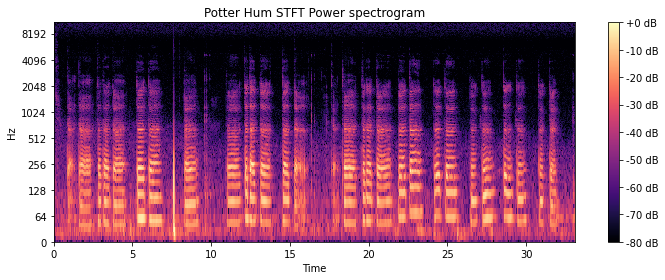

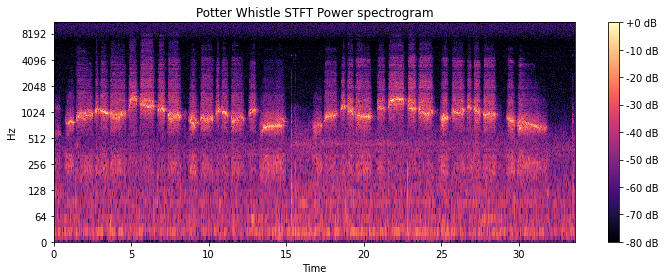

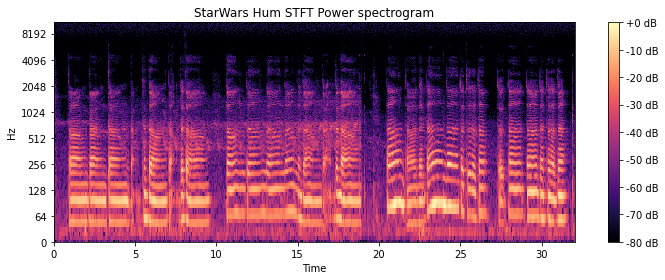

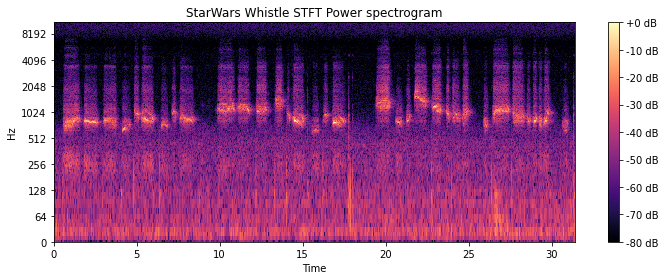

In [ ]:
stft_spectrum_matrix = librosa.stft(potter_hum_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Potter Hum STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(potter_whistle_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Potter Whistle STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(starwars_hum_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('StarWars Hum STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(starwars_whistle_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('StarWars Whistle STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

###Plotting MFCC

Positive MFCCs correspond to low-frequency regions of the cepstrum, and negative MFFCs to high-frequency.

We can see from the below plots that potter song has more proportions of negative MFFCs, corresponding to the StarWars

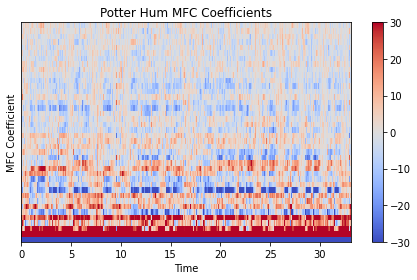

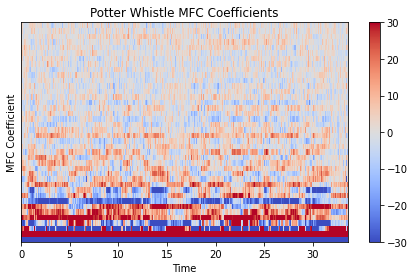

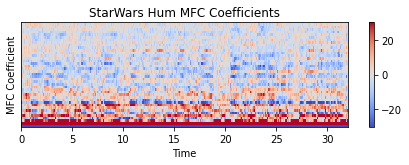

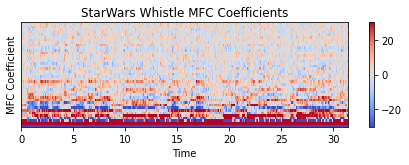

In [ ]:
from matplotlib.colors import Normalize

with soundfile.SoundFile(potter_hum) as audio:
    potter_hum_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    mfc_coefficients = librosa.feature.mfcc(y=potter_hum_waveform, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
    plt.colorbar()
    plt.yticks(())
    plt.ylabel('MFC Coefficient')
    plt.title('Potter Hum MFC Coefficients')
    plt.tight_layout()

with soundfile.SoundFile(potter_whistle) as audio:
    potter_whistle_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    mfc_coefficients = librosa.feature.mfcc(y=potter_whistle_waveform, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 2)
    librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
    plt.colorbar()
    plt.yticks(())
    plt.ylabel('MFC Coefficient')
    plt.title('Potter Whistle MFC Coefficients')
    plt.tight_layout()


with soundfile.SoundFile(starwars_hum) as audio:
    starwars_hum_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    mfc_coefficients = librosa.feature.mfcc(y=starwars_hum_waveform, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 2, 1)
    librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
    plt.colorbar()
    plt.yticks(())
    plt.ylabel('MFC Coefficient')
    plt.title('StarWars Hum MFC Coefficients')
    plt.tight_layout()

with soundfile.SoundFile(starwars_whistle) as audio:
    starwars_whistle_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    mfc_coefficients = librosa.feature.mfcc(y=starwars_whistle_waveform, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 2, 2)
    librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
    plt.colorbar()
    plt.yticks(())
    plt.ylabel('MFC Coefficient')
    plt.title('StarWars Whistle MFC Coefficients')
    plt.tight_layout()                              


###Plot Chromogram

The pitch distribution of the StarWars song has a lower dispersion compared to the Potter song, whose pitch has a higher dispersion at any point in time. This makes intuitive sense considering the music of StarWars is more on high scale compared to a soothing Harry Potter tone. But, Harry Potter whistle follows a slighlt different scale and thus can confuse the model with StarWars Whistle.

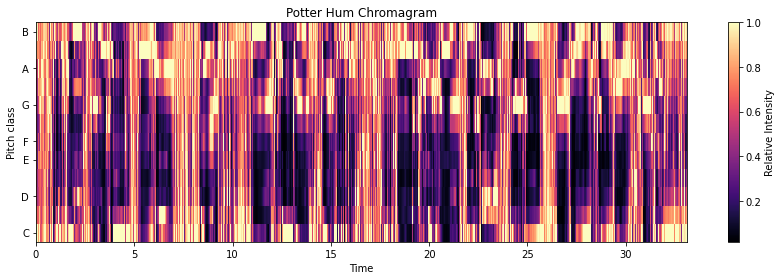

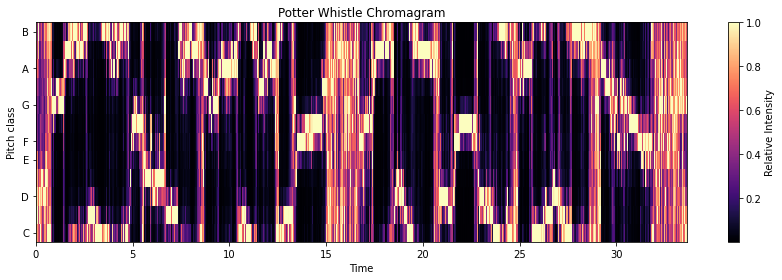

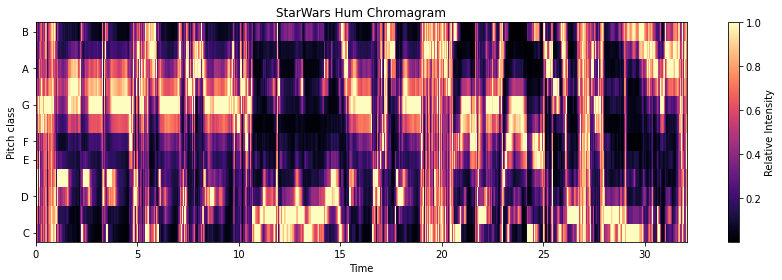

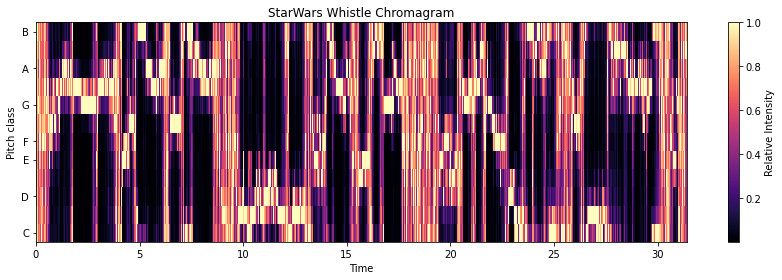

In [ ]:

with soundfile.SoundFile(potter_hum) as audio:
    potter_hum_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    chromagram = librosa.feature.chroma_stft(y=potter_hum_waveform, sr=sample_rate)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
    plt.colorbar(label='Relative Intensity')
    plt.title('Potter Hum Chromagram')
    plt.tight_layout()

with soundfile.SoundFile(potter_whistle) as audio:
    potter_whistle_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    chromagram = librosa.feature.chroma_stft(y=potter_whistle_waveform, sr=sample_rate)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
    plt.colorbar(label='Relative Intensity')
    plt.title('Potter Whistle Chromagram')
    plt.tight_layout()


with soundfile.SoundFile(starwars_hum) as audio:
    starwars_hum_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    chromagram = librosa.feature.chroma_stft(y=starwars_hum_waveform, sr=sample_rate)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
    plt.colorbar(label='Relative Intensity')
    plt.title('StarWars Hum Chromagram')
    plt.tight_layout()

with soundfile.SoundFile(starwars_whistle) as audio:
    starwars_whistle_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    chromagram = librosa.feature.chroma_stft(y=starwars_whistle_waveform, sr=sample_rate)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
    plt.colorbar(label='Relative Intensity')
    plt.title('StarWars Whistle Chromagram')
    plt.tight_layout()  


##7.4 Feature Extraction

Based on the above spectograms, we can analye that further transformation on the STFT will yield good features. 

###Mel-Frequency Cepstral Coefficients (MFCC)
We will extract more features from STFT using MFCC. MFCC is a mathematical method which transforms the power spectrum of an audio signal to a small number of coefficients representing power of the audio signal in a frequency region (a region of pitch) against time. 
We can read more about MFCC - [here](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)

On experimentation, 40 coefficients provided the best accuracy and thus selected n_mfcc=40.

### Chromogram
To extract an additional feature, we are using chromagram on each power spectrogram computed by STFT. A chromagram represents an audio signal w.r.t. time, mapping audio signal to a pitch class. Most often, we map to the 12 standard pitch classes. 
More details about Chromogram are available [here](https://en.wikipedia.org/wiki/Chroma_feature)




In [ ]:
import librosa

def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs, frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

def get_feature_chromagram(waveform, sample_rate):
  # STFT computed here explicitly;  MFCC functions does this under the hood
  stft_spectrogram=np.abs(librosa.stft(waveform))
  # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
  chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
  return chromagram

def get_feature_mfcc(waveform, sample_rate):
  # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
  # with 40 coefficients
  mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
  return mfc_coefficients

In [ ]:
import soundfile

def get_features(file):
  # load an individual soundfile
  with soundfile.SoundFile(file) as audio:
    # Calculate Pitch related features  
    fs = None # if None, fs would be 44100
    x, fs = librosa.load(file,sr=fs)
    x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    # compute features of soundfile
    chromagram = get_feature_chromagram(waveform, sample_rate)
    mfc_coefficients = get_feature_mfcc(waveform, sample_rate)

    feature_matrix=np.array([])
    # use np.hstack to combine individual feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((power, pitch_mean, pitch_std, voiced_fr, chromagram, mfc_coefficients))
    #feature_matrix = np.hstack((chromagram, mfc_coefficients))
    
    return feature_matrix

### Issue identified: Difference in the channel of songs

During feature extraction using soundFile, Some of the files of the same song have Mono channel whereas others have Sterio channel. Therefore, changing the channel to mono for sterio files before processing through a librosa function.For changing the channel AudioSegment function of pydub library is used as below:

In [ ]:
import os
!pip install pydub
from pydub import AudioSegment

def load_data(input_data):
    X,y=[],[]
    mono_files_path = "/content/drive/MyDrive/Data/MLEndHW/Mono/"
    for file in tqdm(input_data["file_path"]):
        file_name=os.path.basename(file)
        song_title=str(input_data.loc[file_name]['song'])
        sound = AudioSegment.from_wav(file)
        if sound.channels == 2:
          sound = sound.set_channels(1)
          temp_path = mono_files_path +  file_name
          sound.export(temp_path, format="wav")
          file = temp_path
        features = get_features(file)
        X.append(features)
        y.append(song_title)
    return np.array(X), y

Call the feature extraction function. Finally, all the required features are received in features and song labels in song_titles

In [ ]:
features, songs_titles = load_data(df_all_songs)

100%|██████████| 818/818 [46:43<00:00,  3.43s/it]


###Features Data

In [ ]:
print(f'\nTotal Songs processed: {features.shape[0]}')
print(f'Total features extracted for each audio: {features.shape[1]}')
column_headers = ["pitch", "pitch_mean", "pitch_std", "voiced_fr"]
column_headers += ["CHROMA-" + str(i+1) for i in range(12)] + ["MFCC-" + str(i+1) for i in range(40)]
features_df = pd.DataFrame(features, columns=column_headers).set_index(df_all_songs.index)
features_df


Total Songs processed: 818
Total features extracted for each audio: 56


,pitch,pitch_mean,pitch_std,voiced_fr,CHROMA-1,CHROMA-2,CHROMA-3,CHROMA-4,CHROMA-5,CHROMA-6,CHROMA-7,CHROMA-8,CHROMA-9,CHROMA-10,CHROMA-11,CHROMA-12,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,MFCC-6,MFCC-7,MFCC-8,MFCC-9,MFCC-10,MFCC-11,MFCC-12,MFCC-13,MFCC-14,MFCC-15,MFCC-16,MFCC-17,MFCC-18,MFCC-19,MFCC-20,MFCC-21,MFCC-22,MFCC-23,MFCC-24,MFCC-25,MFCC-26,MFCC-27,MFCC-28,MFCC-29,MFCC-30,MFCC-31,MFCC-32,MFCC-33,MFCC-34,MFCC-35,MFCC-36,MFCC-37,MFCC-38,MFCC-39,MFCC-40
file_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_hum_2_Potter.wav,0.001961,107.628769,14.832539,0.461431,0.742767,0.690326,0.660877,0.660795,0.662915,0.622716,0.646010,0.695663,0.706474,0.735832,0.759510,0.755502,-605.807129,165.489136,41.869949,8.794005,26.851433,-9.104386,9.667110,3.957080,7.824900,-17.073029,0.011915,-3.564875,2.940127,10.176422,5.760490,-5.566876,-2.753666,1.763527,3.331302,3.010061,-3.546005,-0.425447,-0.221528,-2.480451,-6.850127,-3.291232,0.767346,-2.411904,-3.923581,-3.530725,-1.254670,-0.269810,0.473792,-1.967038,-1.026481,-0.399077,-0.805775,-0.383710,0.345897,0.674885
S1_whistle_2_Potter.wav,0.020419,408.684951,31.757141,0.185645,0.556725,0.521498,0.464250,0.431538,0.434829,0.479719,0.483621,0.457685,0.465921,0.520877,0.566653,0.567462,-594.839844,123.927803,-20.146408,-8.145898,27.507767,12.582005,13.657412,-21.714359,3.373858,-4.857686,10.960774,2.559646,2.133002,4.727288,2.728300,2.521468,4.990203,1.789778,-1.427056,7.646998,1.763740,-0.755748,-3.381676,-0.003051,2.381489,-2.936876,1.566064,0.030136,-0.284038,-0.992871,0.002949,0.259018,-0.060032,0.249817,0.195295,0.785634,1.507147,1.727802,0.900211,0.161864
S3_hum_1_Potter.wav,0.093276,184.280074,27.611400,0.935164,0.340585,0.336983,0.387763,0.452884,0.483166,0.545644,0.540839,0.581653,0.543787,0.499159,0.390514,0.346335,-377.653198,159.894806,23.447977,9.654292,31.279163,8.544730,-9.901930,8.653574,14.889606,-15.682481,-25.269564,-2.887233,0.906971,-7.967990,-3.218085,-2.120331,-12.062410,-13.886848,-10.682937,-14.828348,-14.790854,-5.996719,-4.315382,-8.951355,-11.999648,-11.360625,-7.741815,-5.671224,-5.191562,-4.804216,-7.461917,-8.203992,-6.099968,-5.664564,-3.595698,-0.525360,-2.719810,-1.894944,4.665475,6.085539
S3_hum_2_Potter.wav,0.062325,178.451926,26.961858,0.895273,0.410224,0.377574,0.416170,0.488386,0.576933,0.640121,0.564904,0.519170,0.457254,0.419939,0.367654,0.399516,-413.636719,152.601944,28.197744,-2.432873,23.173237,21.293707,-0.192425,-1.787847,3.790656,-8.920242,-19.529072,-8.064811,3.005625,0.335121,-3.191446,-4.601825,-7.684365,-9.808799,-10.507849,-10.987802,-10.407001,-8.296804,-6.510858,-6.058813,-7.454916,-8.893862,-8.663980,-5.921562,-3.405213,-5.341537,-8.259684,-6.254352,-3.522742,-3.729656,-3.363257,-0.531699,0.039500,-2.926254,-2.945801,1.088608
S2_hum_2_Potter.wav,0.053654,179.453789,47.873945,0.850131,0.469379,0.447806,0.472163,0.498322,0.539427,0.554901,0.495794,0.457657,0.429589,0.454045,0.492986,0.519820,-677.760254,115.060600,51.676922,44.517956,24.651054,11.469016,21.720299,-4.649032,25.644018,-12.550249,-11.993136,-9.936625,-1.487918,-3.924068,0.079257,6.139918,3.318232,-0.254604,-10.649374,-4.305768,-1.473394,-0.739198,-3.030461,-1.928986,0.314064,-6.372589,-0.887165,-0.381322,-3.332857,1.555084,-1.075537,-1.722804,3.056661,0.184251,2.008181,4.288423,1.512625,2.030877,1.449575,-0.039265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S110_hum_2_Potter.wav,0.013050,335.547092,51.163171,0.870843,0.252089,0.282539,0.357202,0.412050,0.457998,0.440993,0.378643,0.295100,0.248046,0.242208,0.213297,0.234312,-592.441711,90.973801,33.172962,8.565856,-7.335369,-16.525066,-15.567987,-14.722250,-11.267602,-10.038613,-12.517460,-13.765692,-17.634979,-18.805927,-15.162714,-13.011851,-10.900060,-11.614080,-12.714381,-6.990731,-2.642693,-1.825564,1.101745,3.664479,6.626633,9.1

# 8 Results



##8.1 Model Exploration

As the problem statement is to classify the songs into Potter or StarWars based on the audio signal features. We will first select some of the classic Machine learning classification models like Support Vector Machines classifier(SVC), k-Nearest-Neighbout clasifier(kNN), LogisticRegression, Decision Trees, Random Forest Classifier, Gaussian Naive Bayes, etc.

Also, data needs to be scaled because different features have different range of values and thus model can give more weight to the features with higher range. Sklearn library's StandardScaler is used for features with unknown distributions because centering the features at zero-mean with a standard deviation of 1 means extreme values will have less of an impact on the model's learned weights, so that the model is less sensitive to the outliers.

To process these functions, sklearn library's machine learning pipeline is used which automates the above steps.

#### Data Split: Training: 80% and Validation : 20%

In order to compare models,we have to evaluate their performance on an unseen data. The simplest method to do so is by training a model on some portion of our dataset and test it on the remainder. Here we have used sklearn's train_test_split function to create a standard 80/20 train/test split. The model is fit on 80% of the data and tested for performance against 20% of the data, which unseen for it in the training. We are calling it as Validation data.



In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

#test_size=0.2 defines the 20% test size and rest 80% training size
X_train, X_val, y_train, y_val = train_test_split(features,songs_titles,test_size=0.20,random_state=0)
X_train.shape, X_val.shape, len(y_train), len(y_val)

((654, 56), (164, 56), 654, 164)

### Comparing Models

Below is the piepline to train and test the multiple models or our data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

classification_models = [
                         KNeighborsClassifier(n_neighbors=3),
                         SVC(kernel = "linear" ,C=1),
                         SVC(kernel='rbf', C=1),
                         GaussianNB(),
                         LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(n_estimators=500),
                         ]

model_scores = []
for model in classification_models:
  # Pipeline object is created to perform model training and evaluate the performance of each model.
  model_pipeline = Pipeline([('scaler', StandardScaler()), ('model_training', model)])
  model_pipeline.fit(X_train, y_train)

  model_name = type(model).__name__
  if model_name=='SVC' and model.kernel=='rbf': 
    model_name+='RBF kernel'
  
  model_scores.append((model_name,(f'{100*model_pipeline.score(X_val, y_val):.2f}%')))

# Create the dataframe for score of each model
df_model_scores = pd.DataFrame(model_scores,columns=['Classification Model','Accuracy Score'])
df_model_scores.sort_values(by='Accuracy Score',axis=0,ascending=False)



,Classification Model,Accuracy Score
4,LogisticRegression,72.56%
1,SVC,69.51%
6,RandomForestClassifier,66.46%
2,SVCRBF kernel,62.20%
3,GaussianNB,59.76%
0,KNeighborsClassifier,57.32%
5,DecisionTreeClassifier,52.44%


## 8.2 Model Training and Evaluation: 

We will pick the top three models - Logistic Regression, SVC, and Random Forests and further analyze them.



### 8.2.1 Logistic Regression
Logistic regression comes under the supervised learning technique. It is a classification algorithm that is used to predict discrete values such as 0 or 1
Here, we are classifying the data into Potter or StarWars.
Logistic regression is based on the concept of probability. It uses a Logistic function, also known as the Sigmoid function. The hypothesis of logistic regression tends to limit the Sigmoid function between 0 and 1. We use this Sigmoid function to map the predicted values to probabilities.

####Model pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(features,songs_titles,test_size=0.20,random_state=0)

pipeline_logistic = Pipeline([('scaler', StandardScaler()), ('logisticR', LogisticRegression(C=1.0, max_iter=500, solver="liblinear"))])
pipeline_logistic.fit(X_train, y_train)

lr_y_train_pred = pipeline_logistic.predict(X_train)
lr_y_val_pred = pipeline_logistic.predict(X_val)

print("Training Accuracy for Logistic Regression pipeline: {}".format(pipeline_logistic.score(X_train, y_train)))
print("Validation Accuracy for Logistic Regression pipeline: {}".format(pipeline_logistic.score(X_val, y_val)))

Training Accuracy for Logistic Regression pipeline: 0.7370030581039755
Validation Accuracy for Logistic Regression pipeline: 0.725609756097561


####Confusion Matrix:



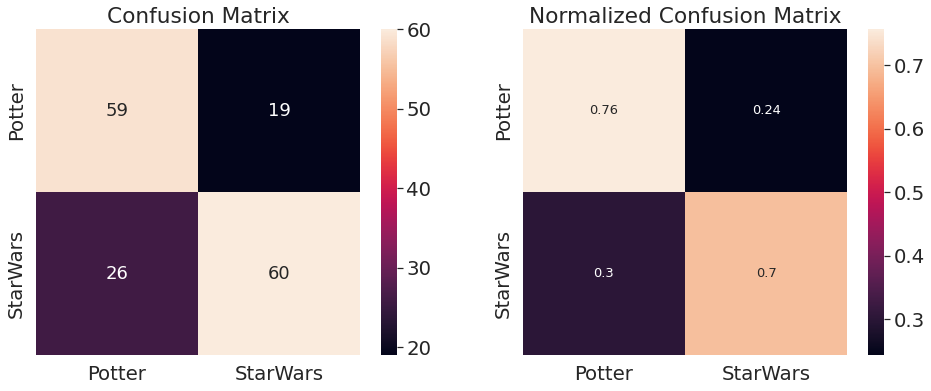

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set 
test_song_predictions = lr_y_val_pred
test_songs_groundtruth = y_val

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_songs_groundtruth, test_song_predictions)
conf_matrix_norm = confusion_matrix(test_songs_groundtruth, test_song_predictions,normalize='true')

# set labels for matrix axes from Songs list
song_list =['Potter', 'StarWars']
song_name = [song for song in song_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=song_name, columns=song_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=song_name, columns=song_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

####Classification Report:

As we can see from the below classification report, LogisticRegression model has 69% precision of classifying the Potter data correctly and 76% precision for StarWars with an overall accuracy of 73%.
Average F1 Score for Logistic Regression model: 72.56%

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


# Output the classification report (which you should save each time for comparing your models)
print(classification_report(y_val, lr_y_val_pred, zero_division=0))
print(precision_recall_fscore_support(y_val, lr_y_val_pred, average='macro',zero_division=0))  # print out accurate macro score

              precision    recall  f1-score   support

      Potter       0.69      0.76      0.72        78
    StarWars       0.76      0.70      0.73        86

    accuracy                           0.73       164
   macro avg       0.73      0.73      0.73       164
weighted avg       0.73      0.73      0.73       164

(0.7268056589724498, 0.7270423375074537, 0.7255995538204127, None)


### 8.2.2 Support Vector Machines classifier(SVC)

Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane. We are analyzing SVC linear, kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane.



####Model Pipeline

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_val, y_train, y_val = train_test_split(features,songs_titles,test_size=0.20,random_state=0)

pipeline_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel="linear", C=1.0))])
pipeline_svc.fit(X_train, y_train)

svc_y_train_pred = pipeline_svc.predict(X_train)
svc_y_val_pred = pipeline_svc.predict(X_val)


print("Training Accuracy for SVC pipeline: {}".format(pipeline_svc.score(X_train, y_train)))
print("Validation Accuracy for SVC pipeline: {}".format(pipeline_svc.score(X_val, y_val)))

Training Accuracy for SVC pipeline: 0.7385321100917431
Validation Accuracy for SVC pipeline: 0.6951219512195121


#### Confusion Matrix

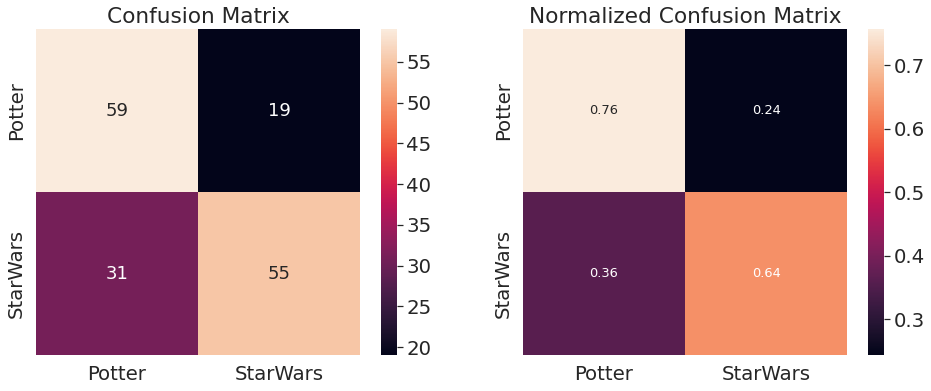

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set 
test_song_predictions = svc_y_val_pred
test_songs_groundtruth = y_val

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_songs_groundtruth, test_song_predictions)
conf_matrix_norm = confusion_matrix(test_songs_groundtruth, test_song_predictions,normalize='true')

# set labels for matrix axes from Songs list
song_list =['Potter', 'StarWars']
song_name = [song for song in song_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=song_name, columns=song_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=song_name, columns=song_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

####Classification Report
Below Classification matrix shows that precision value has slightly decreased for both Potter and StarWars classes. For Potter it has decreased from 69% to 66 percent and 76 to 74% for the latter.
Also, Overall accuract recorded is 69.64 percent as the False Negatives have increased in SVC Model.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# Output the classification report for SVC
print(classification_report(y_val, svc_y_val_pred, zero_division=0))
print(precision_recall_fscore_support(y_val, svc_y_val_pred, average='macro',zero_division=0))

              precision    recall  f1-score   support

      Potter       0.66      0.76      0.70        78
    StarWars       0.74      0.64      0.69        86

    accuracy                           0.70       164
   macro avg       0.70      0.70      0.69       164
weighted avg       0.70      0.70      0.69       164

(0.6993993993993994, 0.6979725700655933, 0.6949404761904763, None)


####Hyperparameters Tuning

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. It calculates the measure of optimization for each combination of values provided in the param grid.

From the below GridSearchCV for SVC, best parameters identified are C:1000, kernel = linear. In this scenario, Recall value for Potter has been increased by 0.01. However, precision has decreased by the same amount. On the other hand, for StarWars class, Precision has increased by 0.01 and recall has decreased by the same amount.

Overall, the accuracy and f1-score is same as above and thus no further improvmement is observed.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Now that we know standard scaling is best for our features, we'll use those for our training and test sets
X_train, X_val, y_train, y_val = train_test_split(features,songs_titles,test_size=0.20,random_state=0)

# Initialize the SVC Classifier and choose parameters we want to keep constant
svc_model = SVC()

# Choose the grid of hyperparameters we want to use for Grid Search to build our candidate models
svc_param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
   
# Create a grid search object which will store the scores and hyperparameters of all candidate models 
svc_grid = GridSearchCV(
    svc_model, 
    svc_param_grid,
    cv=5)
# Fit the models specified by the parameter grid 
svc_grid.fit(X_train, y_train)

# get the best hyperparameters from grid search object with its best_params_ attribute
print('Best parameters found:\n', svc_grid.best_params_)

print(svc_grid.best_score_)
svc_grid_predict = svc_grid.predict(X_val)
print(confusion_matrix(y_val,svc_grid_predict))
print(classification_report(y_val,svc_grid_predict))

Best parameters found:
 {'C': 1000, 'kernel': 'linear'}
0.6407633587786259
[[60 18]
 [32 54]]
              precision    recall  f1-score   support

      Potter       0.65      0.77      0.71        78
    StarWars       0.75      0.63      0.68        86

    accuracy                           0.70       164
   macro avg       0.70      0.70      0.69       164
weighted avg       0.70      0.70      0.69       164



### 8.2.3 RandomForestClassifier

Random forest is an extension of bagging, but taking one extra step. Along with taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many decision trees, it becomes a random forest.

By allowing each tree to randomly sample from the dataset with replacement we get different trees since decision trees are sensitive to data they are trained on.

Random Forests are excellent models to use as a benchmark due to their low time complexity to train and because it is an ensemble method, their robustness to unknown distributions and outliers in the dataset, meaning Random Forests require relatively little exploratory analysis in both the data and training the model to get an idea of their performance in a task.

####Model Pipeline

RandomForest piepline is created using the Standard Scaler and RandomForestClassifier. Model is trained on the scaled input data before using it for prediction on validation data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_val, y_train, y_val = train_test_split(features,songs_titles,test_size=0.20,random_state=0)

pipeline_rfc = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier())])
pipeline_rfc.fit(X_train, y_train)

rfc_y_train_pred = pipeline_rfc.predict(X_train)
rfc_y_val_pred = pipeline_rfc.predict(X_val)

print("Training Accuracy for RandomForestClassifier pipeline: {}".format(pipeline_rfc.score(X_train, y_train)))
print("Validation Accuracy for RandomForestClassifier pipeline: {}".format(pipeline_rfc.score(X_val, y_val)))

Training Accuracy for RandomForestClassifier pipeline: 1.0
Validation Accuracy for RandomForestClassifier pipeline: 0.6341463414634146


####Confusion Matrix

Confusion matrix generated by the RandomForestClassifier model depicts that the True Positives (Values Identified correctly that they belong to a particular class) and True Negatives (Values Identified correctly that they do not belong to a particular class) have decreased slightly and more samples are misclassified in case of RandomForestClassifier. 

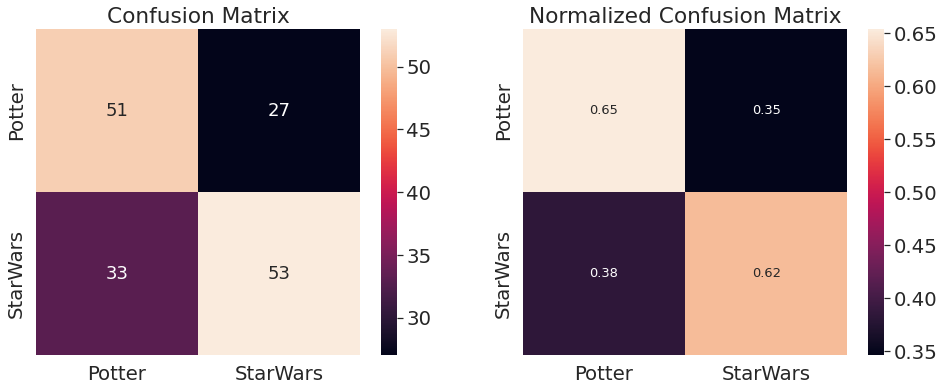

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set 
test_song_predictions = rfc_y_val_pred
test_songs_groundtruth = y_val

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_songs_groundtruth, test_song_predictions)
conf_matrix_norm = confusion_matrix(test_songs_groundtruth, test_song_predictions,normalize='true')

# set labels for matrix axes from Songs list
song_list =['Potter', 'StarWars']
song_name = [song for song in song_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=song_name, columns=song_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=song_name, columns=song_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

####Classification Report

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# Output the classification report for RFC
print(classification_report(y_val, rfc_y_val_pred, zero_division=0))
print(precision_recall_fscore_support(y_val, rfc_y_val_pred, average='macro',zero_division=0))

              precision    recall  f1-score   support

      Potter       0.61      0.65      0.63        78
    StarWars       0.66      0.62      0.64        86

    accuracy                           0.63       164
   macro avg       0.63      0.64      0.63       164
weighted avg       0.64      0.63      0.63       164

(0.6348214285714285, 0.6350626118067979, 0.6340919232485498, None)


####Hyperparamter Tuning

On optimizing the parameters value for RandomForestClassifier using GridSearchSV, Overall accuracy achieved is 65% which is slightly better than the original value of 63% but it is still less than the accuracy which the other two models provided.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Now that we know standard scaling is best for our features, we'll use those for our training and test sets
X_train, X_val, y_train, y_val = train_test_split(features,songs_titles,test_size=0.20,random_state=0)

# Initialize the RFC Classifier and choose parameters we want to keep constant
rfc_model = RandomForestClassifier()

# Choose the grid of hyperparameters we want to use for Grid Search to build our candidate models
rfc_param_grid={
    'n_estimators': [200, 500, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']}
   
# Create a grid search object which will store the scores and hyperparameters of all candidate models 
rfc_param_grid = GridSearchCV(
    rfc_model, 
    rfc_param_grid,
    cv=5
    )
# Fit the models specified by the parameter grid 
tqdm(rfc_param_grid.fit(X_train, y_train))

# get the best hyperparameters from grid search object with its best_params_ attribute
print('Best parameters found:\n', rfc_param_grid.best_params_)

print(rfc_param_grid.best_score_)
rfc_grid_predict = rfc_param_grid.predict(X_val)
print(confusion_matrix(y_val,rfc_grid_predict))
print(classification_report(y_val,rfc_grid_predict))

0it [00:00, ?it/s]

Best parameters found:
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.6836054022313565
[[53 25]
 [33 53]]
              precision    recall  f1-score   support

      Potter       0.62      0.68      0.65        78
    StarWars       0.68      0.62      0.65        86

    accuracy                           0.65       164
   macro avg       0.65      0.65      0.65       164
weighted avg       0.65      0.65      0.65       164



### 8.2.4 MLP Model for Classification


We can also test the Multilayer Perceptron (MLP) Classifier, a simple artificial neural network (ANN) model well-suited for predictions trained on labelled inputs. Note that an MLP model can be trained for regression just as well. An MLP network consists of an input layer, n hidden layers, and an output layer. 

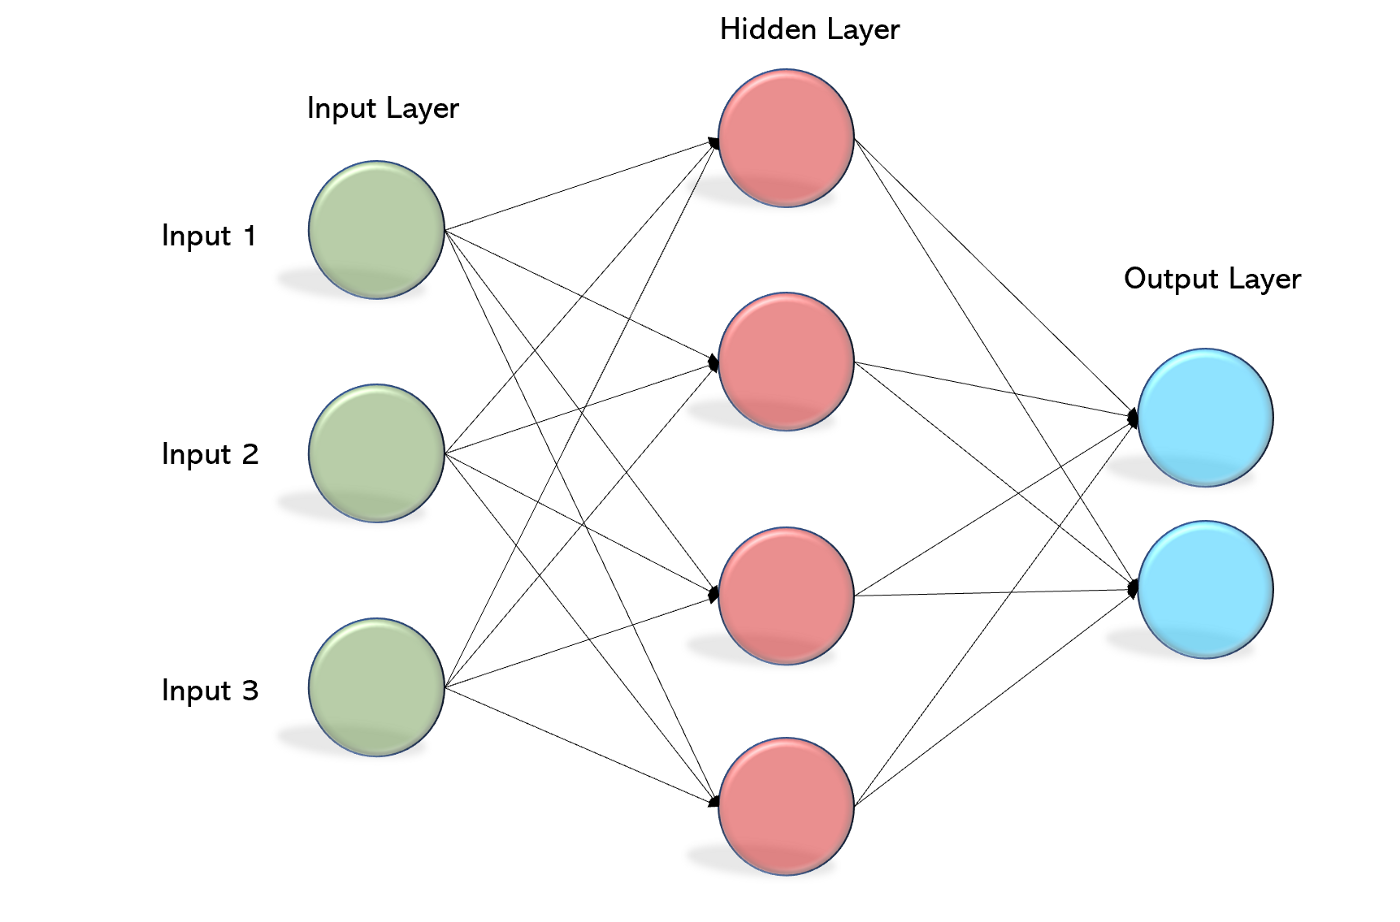

####Model Pipeline

We initialize an MLP classification model with random weights and biases at zero, the standard modality. There are techniques for determining optimal weight initialization; the initial distribution of weights is incrediby important because they impact the direction of the gradient and will determine how fast and whether at all a model's loss function will converge.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
songs_titles_encoded = encoder.fit_transform(songs_titles)

X_train, X_val, y_train, y_val = train_test_split(features,songs_titles_encoded,test_size=0.20,random_state=0)

# Default MLP from sklearn
mlp_model = MLPClassifier(random_state = 69)
mlp_model.fit(X_train, y_train)

print(f'Possible song predicted by model:{mlp_model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*mlp_model.score(X_train, y_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on test set is {100*mlp_model.score(X_val, y_val):.2f}%')


X_train, X_val, y_train, y_val = train_test_split(features,songs_titles_encoded,test_size=0.20,random_state=0)
pipeline_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(random_state = 69))])

pipeline_mlp.fit(X_train, y_train)

mlp_y_train_pred = pipeline_mlp.predict(X_train)
mlp_y_val_pred = pipeline_mlp.predict(X_val)

print(f'Scaled MLP Model\'s accuracy on training set is {100*pipeline_mlp.score(X_train, y_train):.2f}%')
print(f'Scaled MLP Model\'s accuracy on test set is {100*pipeline_mlp.score(X_val, y_val):.2f}%')

Possible song predicted by model:[0 1]
Unscaled MLP Model's accuracy on training set is 73.55%
Unscaled MLP Model's accuracy on test set is 53.05%
Scaled MLP Model's accuracy on training set is 99.39%
Scaled MLP Model's accuracy on test set is 60.98%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


####Hyperparameter Tuning

Great - we expected terrible performance with no thought given to the model or feature scale and Improvement observed on using the StandardScaler on the training data.

The MLP model has a number of significant hyperparameters:

**Alpha**: Constrains the weights to be within a certain bound to address overfitting; in range [0,1], it regularizes the cost function and so is also called the regularization term.

**Activation function:** Determines the output of a perceptrons by the transformation applied to the set of inputs to that perceptron.

**Solver**: Algorithm(s) used for optimization of our weights (with backpropogation gradient descent in the case of the MLP classifier)

**Max Iterations**: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. 

**Learning rate**: How large of a change the optimization algorithm makes to the model's weights at each training iteration

**Epsilon**: Unique to the 'adam' solver, numerical stability - to avoid divison by zero.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Now that we know standard scaling is best for our features, we'll use those for our training and test sets
X_train, X_val, y_train, y_val = train_test_split(features,songs_titles_encoded,test_size=0.20,random_state=0)

# Initialize the MLP Classifier and choose parameters we want to keep constant
mlp_model = MLPClassifier(
    # tune batch size later 
    batch_size=256,  
    # keep random state constant to accurately compare subsequent models
    random_state=69
)

# Choose the grid of hyperparameters we want to use for Grid Search to build our candidate models
parameter_space = {
    # A single hidden layer of size between 2 (output classes) and 56 (input features) neurons is most probable
    # It's a bad idea at guessing the number of hidden layers to have but we'll give 2 and 3 hidden layers a shot to reaffirm our suspicions that 1 is best

    'hidden_layer_sizes': [(2,), (56,), (300,),(100,50,),(10,10,10)], 
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'epsilon': [1e-08, 0.1 ],
    'learning_rate': ['adaptive', 'constant'],
    'max_iter': [200, 500]
}
   
# Create a grid search object which will store the scores and hyperparameters of all candidate models 
mlp_grid = GridSearchCV(
    mlp_model, 
    parameter_space,
    cv=5)
# Fit the models specified by the parameter grid 
mlp_grid.fit(X_train, y_train)

# get the best hyperparameters from grid search object with its best_params_ attribute
print('Best parameters found:\n', mlp_grid.best_params_)
print("Best Score: {}".format(rfc_param_grid.best_score_))
mlp_grid_predict = mlp_grid.predict(X_val)
print(confusion_matrix(y_val,mlp_grid_predict))
print(classification_report(y_val,mlp_grid_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'epsilon': 1e-08, 'hidden_layer_sizes': (56,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
Best Score: 0.6836054022313565
[[52 26]
 [37 49]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        78
           1       0.65      0.57      0.61        86

    accuracy                           0.62       164
   macro avg       0.62      0.62      0.62       164
weighted avg       0.62      0.62      0.62       164



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Fitting the MLPClassifier with tuned hyperparamters with increased size of the hidden layers to 512

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features,songs_titles_encoded,test_size=0.20,random_state=0)
pipeline_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(activation='logistic', alpha= 0.001, solver='adam', epsilon=1e-08, hidden_layer_sizes=(512,), 
                                               learning_rate='adaptive',max_iter=500))])

pipeline_mlp.fit(X_train, y_train)

mlp_y_train_pred = pipeline_mlp.predict(X_train)
mlp_y_val_pred = pipeline_mlp.predict(X_val)

print(f'Scaled MLP Model\'s accuracy on training set is {100*pipeline_mlp.score(X_train, y_train):.2f}%')
print(f'Scaled MLP Model\'s accuracy on test set is {100*pipeline_mlp.score(X_val, y_val):.2f}%')

Scaled MLP Model's accuracy on training set is 72.78%
Scaled MLP Model's accuracy on test set is 73.78%


####Confusion Matrix

Grid search chose the logistic sigmoid function as the best activation function, suited to binary classification. Our two classes Potter and StarWars precision and recall values have increased and in the similar range as Logistic Regression classifier.

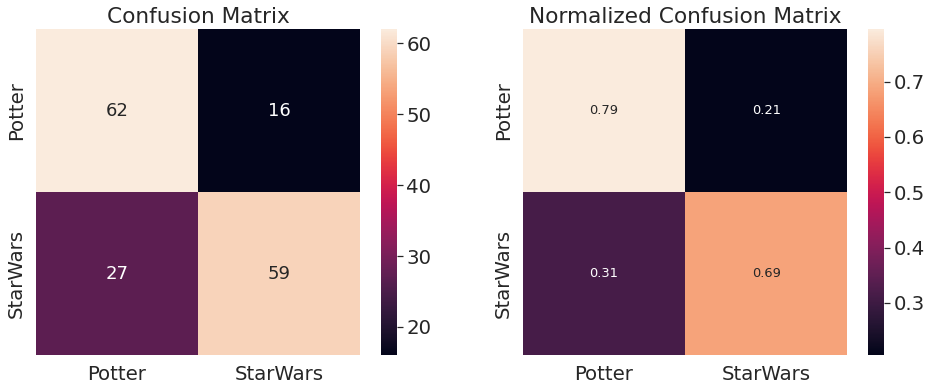

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set 
test_song_predictions = mlp_y_val_pred
test_songs_groundtruth = y_val

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_songs_groundtruth, test_song_predictions)
conf_matrix_norm = confusion_matrix(test_songs_groundtruth, test_song_predictions,normalize='true')

# set labels for matrix axes from emotions
song_list =['Potter', 'StarWars']
song_name = [song for song in song_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=song_name, columns=song_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=song_name, columns=song_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

####Classification Matrix

Below classification matrix for MLPClassifier depicts that the precision and recall values as well as overall accuracy of the model are very similar to the logistic regression classifier. It confirms the logistic behaviour of the model as the activation function which gives the maximum accuracy for MLPClassifier is also logistic.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# Output the classification report for RFC
print(classification_report(y_val, mlp_y_val_pred, zero_division=0))
print(precision_recall_fscore_support(y_val, mlp_y_val_pred, average='macro',zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        78
           1       0.79      0.69      0.73        86

    accuracy                           0.74       164
   macro avg       0.74      0.74      0.74       164
weighted avg       0.74      0.74      0.74       164

(0.7416479400749063, 0.7404591532498509, 0.7377171123591326, None)


# 9 Conclusions



We've looked at the different classification models and used them to identify the audio between two songs - Potter and StarWars. 

The LogisticRegression Classifier and MLPClassifier with logistic function resulted in the best performance in the task of classifying Hums and Whistle data into respective classes. Overall accuracy achieved by these clasifiers is 73% and 74% respectively. 

Logistic Regression classifier is easy to implement whereas MLPClassifier is powerful in that it achieves appreciable performance especially taking advantage of grid search, to tune each hyperparameter individually.

We have also determined that feature engineering is the crucial part of a machine learning problem. Further analysis of the audio features can further improve the accuracy of our model.
